To accommodate the large number of tourists looking for short-term (ranging from a few nights to many months) accommodations, New York City is home to a large number of Airbnb listings. Here, I've combined data from several file formats to examine the New York Airbnb market.

Three files containing data on 2019 Airbnb listings:

**airbnb_price**
This file containing data on Airbnb listing prices and locations.
- **`listing_id`**: unique identifier of listing
- **`price`**: nightly listing price in USD
- **`nbhood_full`**: name of borough and neighborhood where listing is located

**airbnb_room_type**
This file containing data on Airbnb listing descriptions and room types.
- **`listing_id`**: unique identifier of listing
- **`description`**: listing description
- **`room_type`**: Airbnb has three types of rooms: shared rooms, private rooms, and entire homes/apartments

**airbnb_last_review.tsv**
This file containing data on Airbnb host names and review dates.
- **`listing_id`**: unique identifier of listing
- **`host_name`**: name of listing host
- **`last_review`**: date when the listing was last reviewed

## 1. Reading and Understanding Data

In [140]:
# Import necessary packages
import pandas as pd
import numpy as np

In [141]:
# Import CSV for prices
airbnb_price = pd.read_csv('airbnb_price.csv')
airbnb_price.head()

,listing_id,price,nbhood_full
0,2595,225 dollars,"Manhattan, Midtown"
1,3831,89 dollars,"Brooklyn, Clinton Hill"
2,5099,200 dollars,"Manhattan, Murray Hill"
3,5178,79 dollars,"Manhattan, Hell's Kitchen"
4,5238,150 dollars,"Manhattan, Chinatown"


In [142]:
airbnb_price.shape

(25209, 3)

In [143]:
# Import TSV for review dates
airbnb_last_review = pd.read_csv('airbnb_last_review.tsv', sep='\t')
airbnb_last_review.head()

,listing_id,host_name,last_review
0,2595,Jennifer,May 21 2019
1,3831,LisaRoxanne,July 05 2019
2,5099,Chris,June 22 2019
3,5178,Shunichi,June 24 2019
4,5238,Ben,June 09 2019


***Important Note:*** The '\t' is the escape sequence for a tab character. By setting sep='\t', you are telling the read_csv() function to interpret tabs as the delimiter between values in the file, indicating that the file is a tab-separated values (TSV) file. In TSV files, each value in a row is separated by a tab character, as opposed to comma-separated values (CSV) where values are typically separated by commas.

So, this line of code is reading a TSV file named 'airbnb_last_review.tsv' using pandas, and it assumes that the values in the file are separated by tabs.

In [144]:
airbnb_last_review.shape

(25209, 3)

In [145]:
# Import Excel file for room types
airbnb_room_type = pd.read_excel('airbnb_room_type.xlsx')
airbnb_room_type.head()


,listing_id,description,room_type
0,2595,Skylit Midtown Castle,Entire home/apt
1,3831,Cozy Entire Floor of Brownstone,Entire home/apt
2,5099,Large Cozy 1 BR Apartment In Midtown East,Entire home/apt
3,5178,Large Furnished Room Near B'way,private room
4,5238,Cute & Cozy Lower East Side 1 bdrm,Entire home/apt


In [146]:
airbnb_room_type.shape

(25209, 3)

#### Merging the three DataFrames

In [147]:
listings = pd.merge(airbnb_price, airbnb_room_type, on='listing_id')
listings = pd.merge(listings, airbnb_last_review, on='listing_id')

In [148]:
listings.head()

,listing_id,price,nbhood_full,description,room_type,host_name,last_review
0,2595,225 dollars,"Manhattan, Midtown",Skylit Midtown Castle,Entire home/apt,Jennifer,May 21 2019
1,3831,89 dollars,"Brooklyn, Clinton Hill",Cozy Entire Floor of Brownstone,Entire home/apt,LisaRoxanne,July 05 2019
2,5099,200 dollars,"Manhattan, Murray Hill",Large Cozy 1 BR Apartment In Midtown East,Entire home/apt,Chris,June 22 2019
3,5178,79 dollars,"Manhattan, Hell's Kitchen",Large Furnished Room Near B'way,private room,Shunichi,June 24 2019
4,5238,150 dollars,"Manhattan, Chinatown",Cute & Cozy Lower East Side 1 bdrm,Entire home/apt,Ben,June 09 2019


#### Determining the total number of rows and columns

In [149]:
listings.shape

(25209, 7)

#### Determining more information on the columns

In [150]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25209 entries, 0 to 25208
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   listing_id   25209 non-null  int64 
 1   price        25209 non-null  object
 2   nbhood_full  25209 non-null  object
 3   description  25199 non-null  object
 4   room_type    25209 non-null  object
 5   host_name    25201 non-null  object
 6   last_review  25209 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.3+ MB


Here, 'price' is object data type. It should be float, and 'last_review' should be in date type format as it contains dates. 

## 2. Determining the earliest and most recent review dates

#### To determine the earliest and the most recent date reviews, the last_review date column needs to be converted to datetime type as it is object type.

In [151]:
listings['last_review_date'] = pd.to_datetime(listings['last_review'], format='%B %d %Y')
listings.head()

,listing_id,price,nbhood_full,description,room_type,host_name,last_review,last_review_date
0,2595,225 dollars,"Manhattan, Midtown",Skylit Midtown Castle,Entire home/apt,Jennifer,May 21 2019,2019-05-21
1,3831,89 dollars,"Brooklyn, Clinton Hill",Cozy Entire Floor of Brownstone,Entire home/apt,LisaRoxanne,July 05 2019,2019-07-05
2,5099,200 dollars,"Manhattan, Murray Hill",Large Cozy 1 BR Apartment In Midtown East,Entire home/apt,Chris,June 22 2019,2019-06-22
3,5178,79 dollars,"Manhattan, Hell's Kitchen",Large Furnished Room Near B'way,private room,Shunichi,June 24 2019,2019-06-24
4,5238,150 dollars,"Manhattan, Chinatown",Cute & Cozy Lower East Side 1 bdrm,Entire home/apt,Ben,June 09 2019,2019-06-09


In [152]:
listings.dtypes

listing_id                   int64
price                       object
nbhood_full                 object
description                 object
room_type                   object
host_name                   object
last_review                 object
last_review_date    datetime64[ns]
dtype: object

Now, we can figure out the dates of the earliest and most recent reviews

In [153]:
first_reviewed = listings['last_review_date'].min()
last_reviewed = listings['last_review_date'].max()

print('Earliest Review Date:', first_reviewed)
print('Last Review Date:', last_reviewed)

Earliest Review Date: 2019-01-01 00:00:00
Last Review Date: 2019-07-09 00:00:00


## 3. Finding how many listings are private rooms

In [154]:
listings["room_type"].value_counts(dropna=False)

room_type
Entire home/apt    8458
Private room       7241
entire home/apt    2665
private room       2248
ENTIRE HOME/APT    2143
PRIVATE ROOM       1867
Shared room         380
shared room         110
SHARED ROOM          97
Name: count, dtype: int64

Above "room_type" column is filled with the multiple values of same names. So, we need to fix the issue with this categorical data

In [155]:
listings["room_type"] = listings["room_type"].str.title()

In [156]:
listings["room_type"].value_counts()

room_type
Entire Home/Apt    13266
Private Room       11356
Shared Room          587
Name: count, dtype: int64

Now, this categorical data is cleaned, organized and accessible.

#### Let's visualize the number of room_type

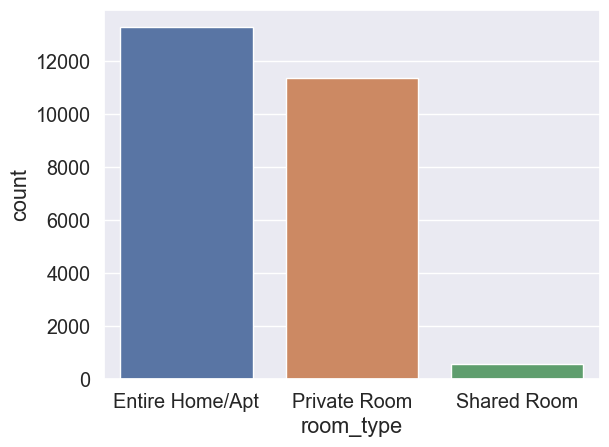

In [157]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale=1.3)
sns.set_style("darkgrid")

sns.countplot(x="room_type", data=listings)

plt.show()


In [158]:
# counting the number of private rooms
private_room_count = listings[listings['room_type'] == 'Private Room'].shape[0]
print("Number of Private Rooms:", private_room_count)

Number of Private Rooms: 11356


## 4. Finding the average listing price

In [159]:
listings.head()

,listing_id,price,nbhood_full,description,room_type,host_name,last_review,last_review_date
0,2595,225 dollars,"Manhattan, Midtown",Skylit Midtown Castle,Entire Home/Apt,Jennifer,May 21 2019,2019-05-21
1,3831,89 dollars,"Brooklyn, Clinton Hill",Cozy Entire Floor of Brownstone,Entire Home/Apt,LisaRoxanne,July 05 2019,2019-07-05
2,5099,200 dollars,"Manhattan, Murray Hill",Large Cozy 1 BR Apartment In Midtown East,Entire Home/Apt,Chris,June 22 2019,2019-06-22
3,5178,79 dollars,"Manhattan, Hell's Kitchen",Large Furnished Room Near B'way,Private Room,Shunichi,June 24 2019,2019-06-24
4,5238,150 dollars,"Manhattan, Chinatown",Cute & Cozy Lower East Side 1 bdrm,Entire Home/Apt,Ben,June 09 2019,2019-06-09


In [160]:
listings['price']

0        225 dollars
1         89 dollars
2        200 dollars
3         79 dollars
4        150 dollars
            ...     
25204    129 dollars
25205     45 dollars
25206    235 dollars
25207    100 dollars
25208     30 dollars
Name: price, Length: 25209, dtype: object

In [161]:
listings['price'].dtypes

dtype('O')

#### # Word 'dollars' needs to be replaced/removed and datatype needs to be changed to float.

In [162]:
listings['price_clean'] = listings['price'].str.replace(' dollars', '').astype(float)
avg_price = listings['price_clean'].mean()

In [79]:
print("Average Listing Price:", avg_price)

Average Listing Price: 141.7779364512674


## 5. Visualizing type of rooms rented with their prices. Are there any outliers?

In [166]:
listings.head()

,listing_id,price,nbhood_full,description,room_type,host_name,last_review,last_review_date,price_clean
0,2595,225 dollars,"Manhattan, Midtown",Skylit Midtown Castle,Entire Home/Apt,Jennifer,May 21 2019,2019-05-21,225.0
1,3831,89 dollars,"Brooklyn, Clinton Hill",Cozy Entire Floor of Brownstone,Entire Home/Apt,LisaRoxanne,July 05 2019,2019-07-05,89.0
2,5099,200 dollars,"Manhattan, Murray Hill",Large Cozy 1 BR Apartment In Midtown East,Entire Home/Apt,Chris,June 22 2019,2019-06-22,200.0
3,5178,79 dollars,"Manhattan, Hell's Kitchen",Large Furnished Room Near B'way,Private Room,Shunichi,June 24 2019,2019-06-24,79.0
4,5238,150 dollars,"Manhattan, Chinatown",Cute & Cozy Lower East Side 1 bdrm,Entire Home/Apt,Ben,June 09 2019,2019-06-09,150.0


C:\Users\shefali sharma\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


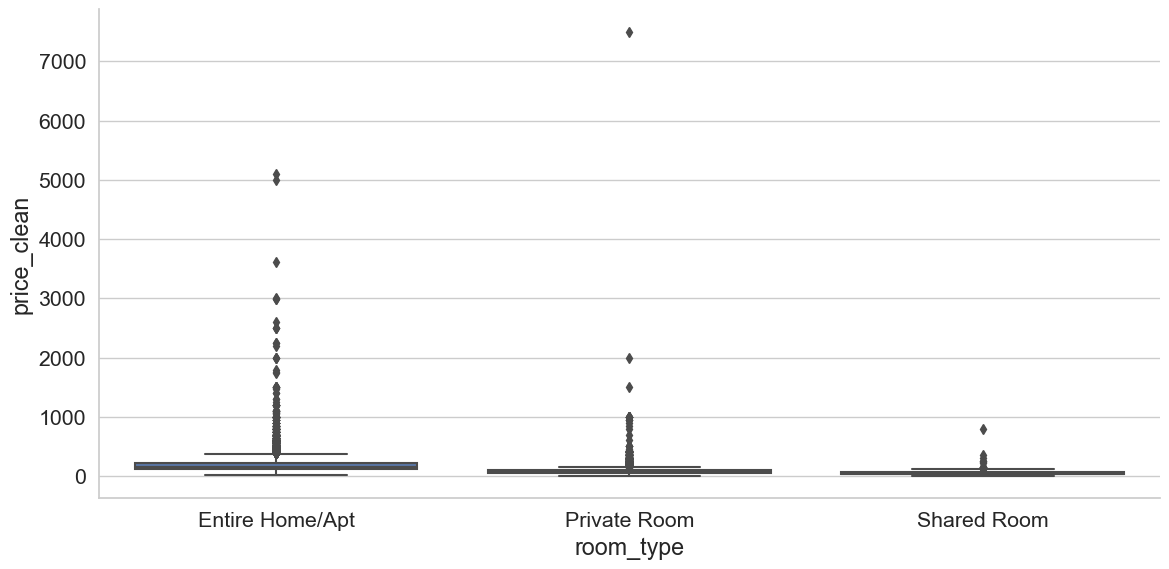

In [167]:
sns.set(font_scale=1.4)

sns.set_style("whitegrid")
sns.catplot(x="room_type", y="price_clean", data=listings, kind="box", height=6, aspect=2)
plt.show()

C:\Users\shefali sharma\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\shefali sharma\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


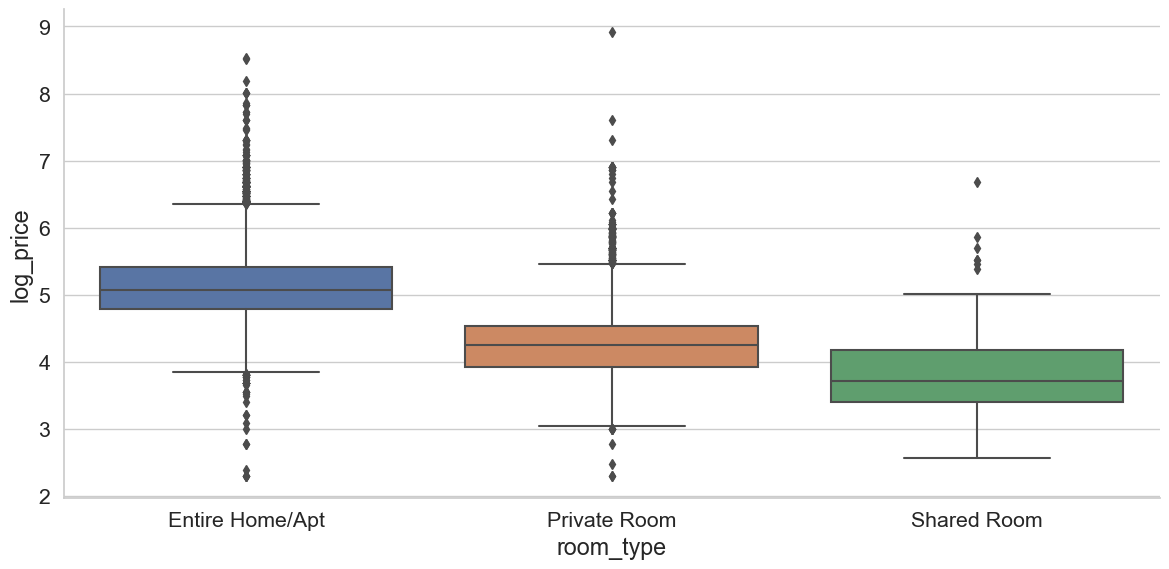

In [168]:
# Set seaborn style
sns.set(font_scale=1.4)
sns.set_style("whitegrid")

# Apply np.log to the 'price_clean' column
listings['log_price'] = np.log(listings['price_clean'])


# Create the catplot with log scale on the y-axis
sns.catplot(x="room_type", y="log_price", data=listings, kind="box", height=6, aspect=2)

# Show the plot
plt.show()

There are some outliers for every room type.

## 6. Creating a dataframe with the four solution values



In [81]:
review_dates = pd.DataFrame({
    'first_reviewed' : [first_reviewed],
    'last_reviewed' : [last_reviewed],
    'nb_private_rooms' : [private_room_count],
    'avg_price': [round(avg_price, 2)]
})

#print(review_dates)
review_dates

,first_reviewed,last_reviewed,nb_private_rooms,avg_price
0,2019-01-01,2019-07-09,11356,141.78


In [169]:
## end of code